In [39]:
import folium
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import random



import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

import networkx as nx



In [2]:
def get_start_end_coordinates(geom):
    start_points = []
    end_points = []
    for line in geom.geoms:  # Access individual LineString geometries within the MultiLineString
        start_points.append(line.coords[0])   # Get the first coordinate of each LineString
        end_points.append(line.coords[-1])    # Get the last coordinate of each LineString
    return start_points, end_points



In [3]:
%%time


# Load & Read GeoJSON file

# file_path = "/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/physical_grid_data/US_Electric_Power_Transmission_Lines_-3845977064911730921.geojson"
# gdf = gpd.read_file(file_path)
# # gdf = gdf.to_crs(epsg=3857)
# gdf = gdf.to_crs(epsg=4326)
 

# # Convert timeframes to folium-friendly types
# gdf['SOURCEDATE'] = pd.to_datetime(gdf['SOURCEDATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')
# gdf['VAL_DATE'] = pd.to_datetime(gdf['VAL_DATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')


file_path = "/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/physical_grid_data/U.S._Electric_Power_Transmission_Lines.geojson"
gdf = gpd.read_file(file_path)
# gdf = gdf.to_crs(epsg=3857)
# gdf = gdf.to_crs(epsg=4326)

 

# Convert timeframes to folium-friendly types
gdf['SOURCEDATE'] = pd.to_datetime(gdf['SOURCEDATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')
gdf['VAL_DATE'] = pd.to_datetime(gdf['VAL_DATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')




CPU times: user 31.8 s, sys: 460 ms, total: 32.2 s
Wall time: 32.3 s


Text(0.5, 1.0, 'Major US Transmission Lines')

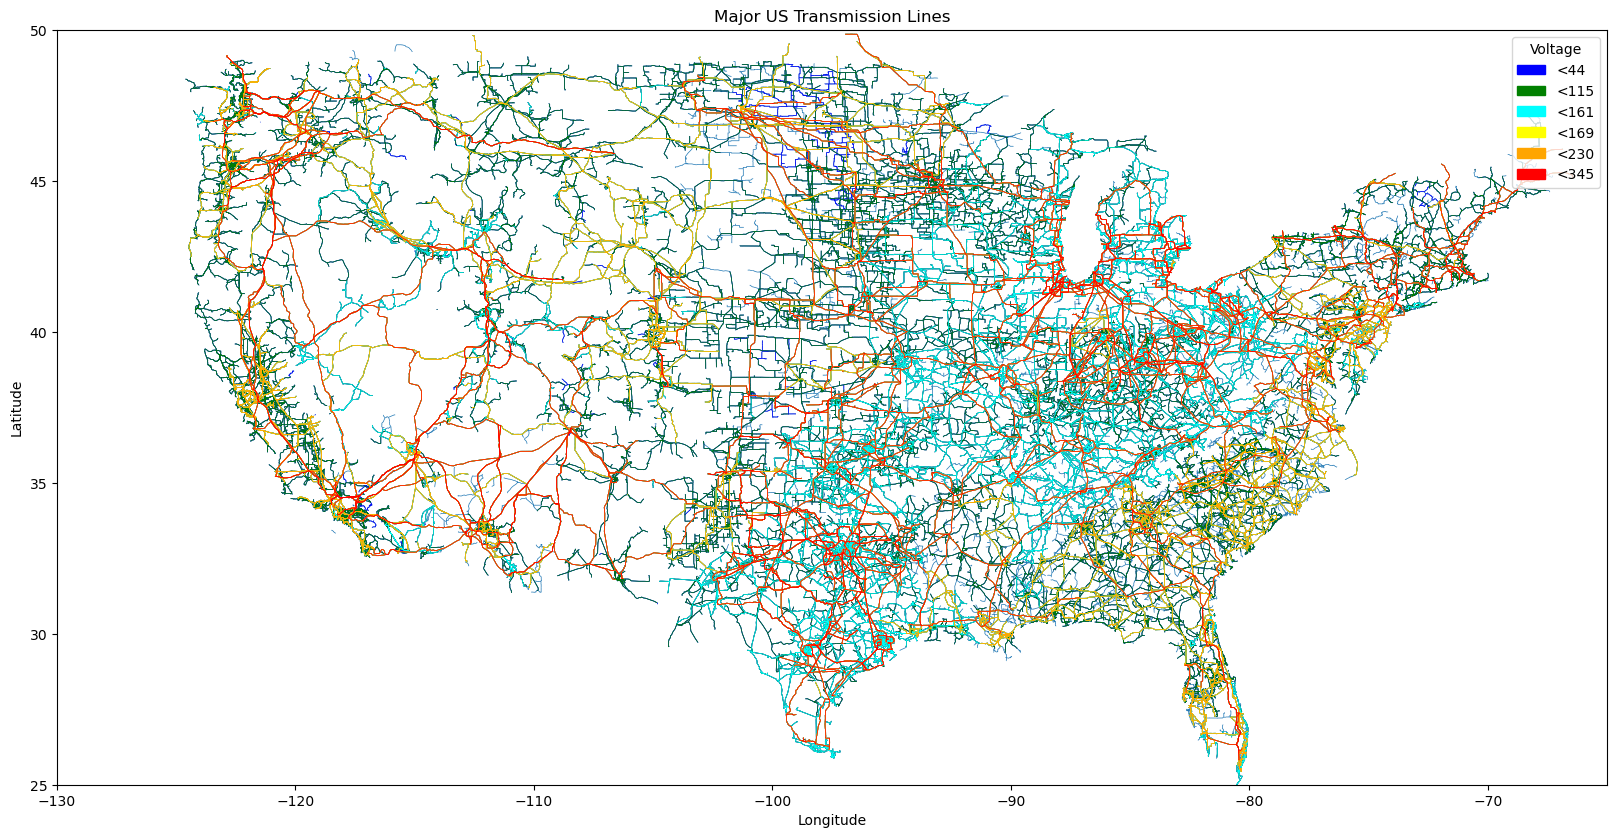

In [4]:
# Plot the GeoDataFrame
map_plot = gdf.plot(figsize=(20, 16),linewidth=0.5)

# Define common voltages and corresponding colors
common_voltages = [0, 44, 115, 161, 169, 230, 345]

hex_colors = ['blue','green', 'cyan', 'yellow', 'orange', 'red']
legend_labels = ['<' + str(i) for i in common_voltages[1:]]

# Plot overlays for each common voltage
for voltage, color, label in zip(common_voltages, hex_colors, legend_labels):
    overlay = gdf[gdf['VOLTAGE'] > voltage]  # Filter GeoDataFrame based on voltage
    overlay.plot(ax=map_plot, marker='o', color=color, markersize=5, linewidth=0.5, label=label)
    
# Create a custom legend with colored patches
legend_handles = [Patch(color=color, label=label) for color, label in zip(hex_colors, legend_labels)]

# Add legend
map_plot.legend(handles=legend_handles, title='Voltage', loc='upper right')

# Set xy axis limits
map_plot.set_xlim((-130, -65))
map_plot.set_ylim((25,50))

# Put labels on the map
map_plot.set_xlabel("Longitude")
map_plot.set_ylabel("Latitude")
map_plot.set_title("Major US Transmission Lines")


In [8]:
gdf

,FID,OBJECTID,ID,TYPE,STATUS,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,...,OWNER,VOLTAGE,VOLT_CLASS,INFERRED,SUB_1,SUB_2,SHAPE__Len,GlobalID,SHAPE_Length,geometry
0,1,501,135919,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 860",2014-08-04T00:00:00,IMAGERY,...,NOT AVAILABLE,69.0,UNDER 100,Y,UNKNOWN115865,TAP142941,29.188701,{73B386A9-AE19-4673-AE34-A87E1E490FE1},0.000227,"MULTILINESTRING ((-92.27198 30.22732, -92.2720..."
1,2,502,141425,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 861",2014-04-07T00:00:00,IMAGERY,...,ALABAMA POWER CO,115.0,100-161,Y,UNKNOWN109093,TAP142857,74.705018,{9EA82903-87B1-4BB6-84B5-9B372F739699},0.000583,"MULTILINESTRING ((-87.82312 30.60263, -87.8232..."
2,3,503,141426,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,IMAGERY,2014-07-15T00:00:00,IMAGERY,...,"DUKE ENERGY CAROLINAS, LLC",100.0,100-161,Y,UNKNOWN115051,TAP154872,70.223774,{6008C7EC-8421-487A-9CB1-22801412BEB7},0.000591,"MULTILINESTRING ((-81.85754 35.03416, -81.8580..."
3,4,504,141429,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, http://www.oatioasis.c...",2014-07-08T00:00:00,IMAGERY,...,TENNESSEE VALLEY AUTHORITY,161.0,100-161,N,FORT PAYNE PRIMARY,TAP152965,12929.295887,{1678DB1B-7C05-4927-A0FA-7E9011CABC1A},0.109258,"MULTILINESTRING ((-85.68872 34.47813, -85.6893..."
4,5,505,141422,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 861, EIA 860",2015-05-28T00:00:00,IMAGERY,...,COMMONWEALTH EDISON CO,138.0,100-161,Y,UNKNOWN121903,TAP137923,1737.440378,{DE001834-13ED-4FE4-96CC-789BDF3B01F9},0.012158,"MULTILINESTRING ((-87.96213 42.03757, -87.9625..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93042,93043,93043,315082,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,Western Electricity Coordinating Council https...,2017-01-01T00:00:00,IMAGERY/OTHER,...,NOT AVAILABLE,230.0,220-287,N,TAP317033,LONE BUTTE,3437.236752,{99755F96-1FD1-403B-9A00-7351EF073AA3},0.025857,"MULTILINESTRING ((-111.99586 33.22352, -111.99..."
93043,93044,93044,315083,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap",2019-11-23T00:00:00,IMAGERY,...,"ENTERGY TEXAS, INC.",138.0,100-161,Y,TAP316626,TAP316629,3287.127256,{4DD4F2D4-470F-4C1F-9948-C28B485F733D},0.028136,"MULTILINESTRING ((-94.06849 30.05597, -94.0669..."
93044,93045,93045,315084,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap",2019-11-23T00:00:00,IMAGERY,...,"ENTERGY TEXAS, INC.",138.0,100-161,Y,TAP316627,TAP316630,103.168311,{1FFEACEF-46E0-49EA-9367-CBD918C10A35},0.000803,"MULTILINESTRING ((-94.06840 30.05450, -94.0684..."
93045,93046,93046,315085,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap",2019-11-23T00:00:00,IMAGERY,...,"ENTERGY TEXAS, INC.",138.0,100-161,Y,TAP316630,TAP316629,90.248211,{CDB30F46-7C14-47A6-A16F-E8ED2DC404F1},0.000707,"MULTILINESTRING ((-94.06846 30.05530, -94.0685..."


In [5]:
# Load California shape file
ca_boundaries_file = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/location_data/ca_state/CA_State.shp'
ca_boundaries = gpd.read_file(ca_boundaries_file)
    
    
ca_boundaries = ca_boundaries.to_crs('EPSG:4326')

    
    

In [6]:
ca_boundaries

,OBJECTID,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,56,4,9,06,01779778,06,CA,California,00,G4000,A,4.034672e+11,2.049980e+10,+37.1551773,-119.5434183,5.258041e+06,5.258041e+06,6.718927e+11,"MULTIPOLYGON (((-117.32095 32.68985, -117.3218..."


Text(0.5, 1.0, 'Major California Transmission Lines')

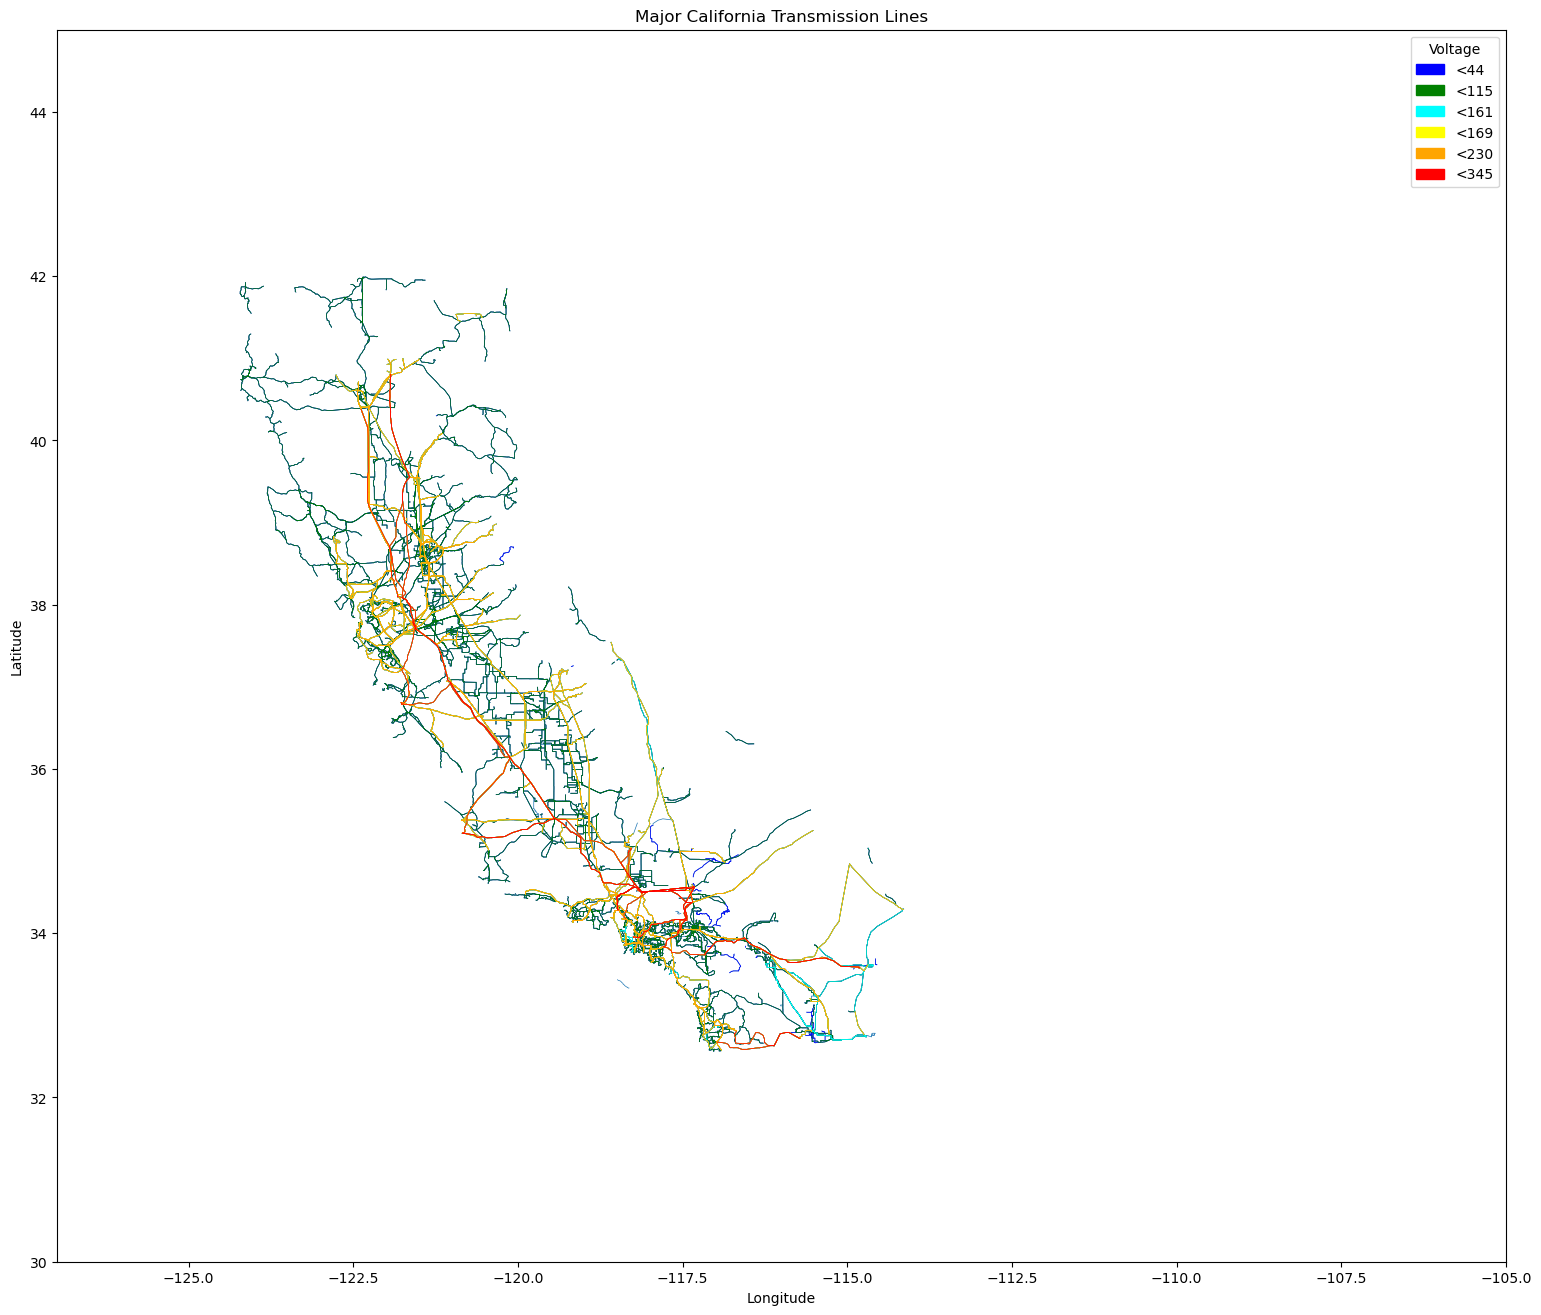

In [7]:
# Assuming your GeoPandas DataFrame is named 'gdf', filter the data within California
data_within_california = gdf[gdf.geometry.within(ca_boundaries.geometry.iloc[0])]

# # Plot the data within California
# ax = ca_boundaries.plot(color='lightgray', edgecolor='black')
# data_within_california.plot(ax=ax, color='blue', markersize=5)

map_plot = data_within_california.plot(figsize=(20, 16),linewidth=0.5)

# Define common voltages and corresponding colors
common_voltages = [0, 44, 115, 161, 169, 230, 345]

hex_colors = ['blue','green', 'cyan', 'yellow', 'orange', 'red']
legend_labels = ['<' + str(i) for i in common_voltages[1:]]

# Plot overlays for each common voltage
for voltage, color, label in zip(common_voltages, hex_colors, legend_labels):
    overlay = data_within_california[data_within_california['VOLTAGE'] > voltage]  # Filter GeoDataFrame based on voltage
    overlay.plot(ax=map_plot, marker='o', color=color, markersize=5, linewidth=0.5, label=label)
    
# Create a custom legend with colored patches
legend_handles = [Patch(color=color, label=label) for color, label in zip(hex_colors, legend_labels)]

# Add legend
map_plot.legend(handles=legend_handles, title='Voltage', loc='upper right')

# Set xy axis limits
map_plot.set_xlim((-127, -105))
map_plot.set_ylim((30,45))

# Put labels on the map
map_plot.set_xlabel("Longitude")
map_plot.set_ylabel("Latitude")
map_plot.set_title("Major California Transmission Lines")



/Users/ryanmc/opt/anaconda3/envs/spwxr_network/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


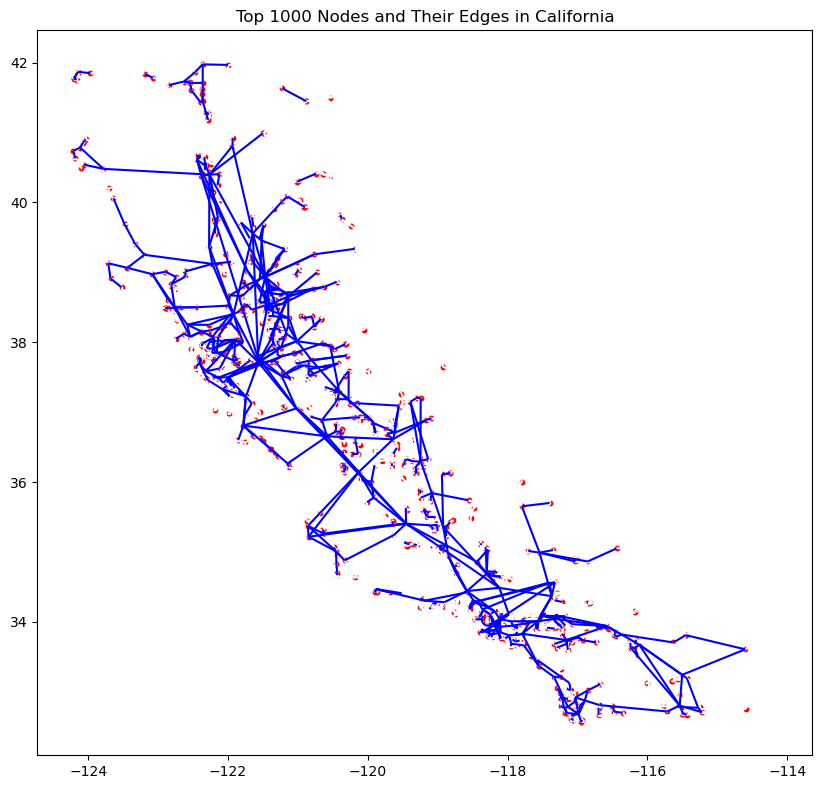

In [11]:
# Construct the power grid network for California region

from shapely.geometry import Point, LineString

# Apply the start and end points function to the MultiLineString geometry
data_within_california['start_points'], data_within_california['end_points'] = zip(*data_within_california['geometry'].apply(lambda geom: get_start_end_coordinates(geom)))

# Create a NetworkX graph
G = nx.Graph()

# Add edges to the graph
for idx, row in data_within_california.iterrows():
    start = tuple(row['start_points'])
    end = tuple(row['end_points'])
    start_id = f"{start[0][0]}_{start[0][1]}"
    end_id = f"{end[0][0]}_{end[0][1]}"
    G.add_edge(start_id, end_id, geometry=LineString([start[0], end[0]]))


# Calculate degree centrality
centrality = nx.degree_centrality(G)

# Get the top X nodes based on degree centrality
num_nodes = 1000
top_X_nodes = sorted(centrality, key=centrality.get, reverse=True)[:num_nodes]

# Get the subgraph of the top X nodes
subgraph = G.subgraph(top_X_nodes)

# Create a GeoDataFrame of the edges for plotting
edges = []
for u, v, data in subgraph.edges(data=True):
    start_coords = tuple(map(float, u.split('_')))
    end_coords = tuple(map(float, v.split('_')))
    edges.append(LineString([start_coords, end_coords]))

edges_gdf = gpd.GeoDataFrame(geometry=edges)

# Create a GeoDataFrame of the nodes for plotting
nodes = [Point(tuple(map(float, node.split('_')))) for node in top_X_nodes]
nodes_gdf = gpd.GeoDataFrame(geometry=nodes)


# Plot California
fig, ax = plt.subplots(figsize=(10, 10))
data_within_california.plot(ax=ax, color='white', edgecolor='black')

# Plot edges and nodes on California map (assuming they are in GeoPandas GeoDataFrames)
edges_gdf.plot(ax=ax, color='blue')
nodes_gdf.plot(ax=ax, color='red', markersize=10)

# Add title and show the plot
plt.title("Top 1000 Nodes and Their Edges in California")
plt.show()



Number of nodes: 4070
Number of edges: 4504
Average degree: 2.213267813267813
Network density: 0.0005439340902599688


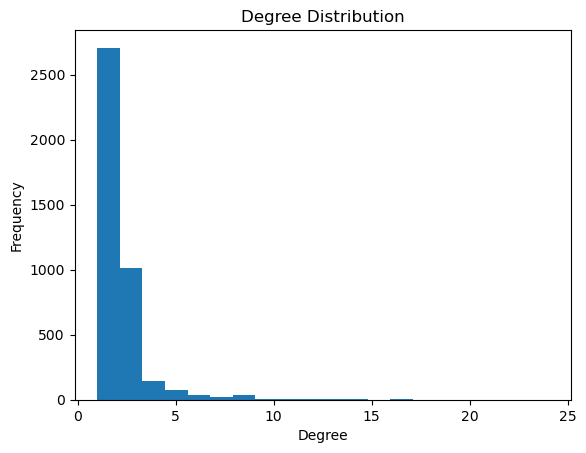

Top 10 nodes by degree centrality: [('-121.98568198599997_37.50072034100003', 0.005898255099533054), ('-121.564927996_37.71242814400006', 0.004669451953797001), ('-119.45216840599994_35.40387473800007', 0.004423691324649791), ('-122.26488017099996_40.397711152000056', 0.00417793069550258), ('-121.46679247599997_38.93519967100008', 0.00417793069550258), ('-117.156656124_33.73893407600008', 0.003686409437208159), ('-121.89679507699998_38.03696943800003', 0.003440648808060948), ('-121.74589595499998_37.22631201000007', 0.003440648808060948), ('-121.92076060999995_38.40101425800003', 0.003440648808060948), ('-116.98418464099996_32.67963750200005', 0.003194888178913738)]
Top 10 nodes by betweenness centrality: [('-119.45216840599994_35.40387473800007', 0.34220580608400625), ('-121.02169890399995_37.053064395000035', 0.3277759877262106), ('-118.11806607099999_34.48629957500003', 0.3130205080532459), ('-121.564927996_37.71242814400006', 0.23278101576408522), ('-117.36874397599996_34.366691470

In [12]:
# Apply network analysis

import networkx as nx

# Basic statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / float(num_nodes)
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree}")
print(f"Network density: {density}")

# Plot degree distribution
degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=20)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Get top nodes by centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodes by degree centrality:", sorted_degree)
print("Top 10 nodes by betweenness centrality:", sorted_betweenness)



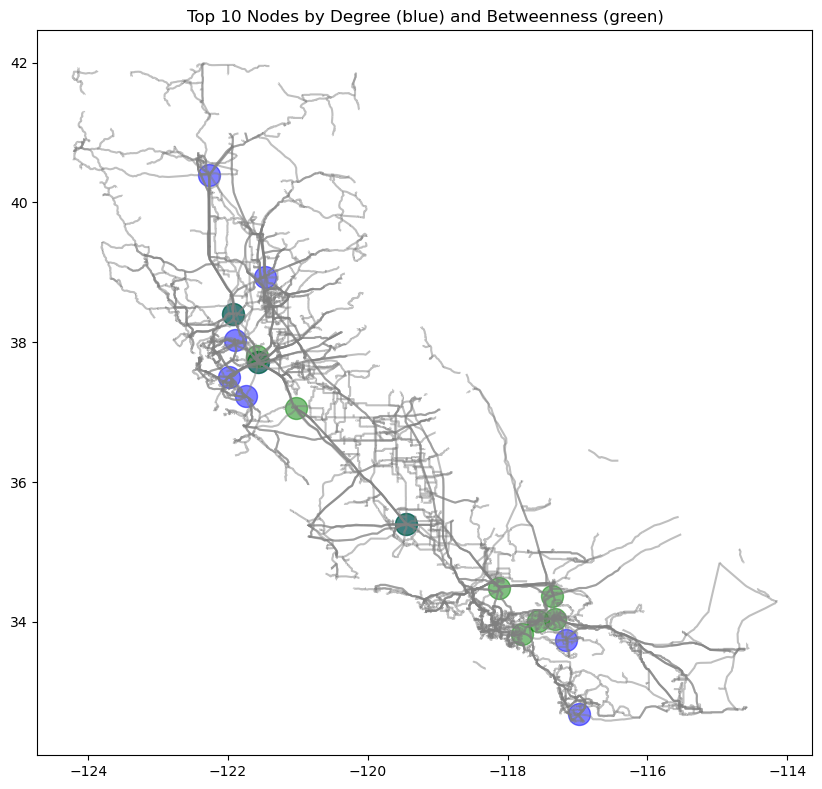

In [27]:
# Get the subgraph of the top X nodes
subgraph_degree = G.subgraph(sorted_degree)
subgraph_betweenness = G.subgraph(sorted_betweenness)

# Create a GeoDataFrame of the nodes for plotting
nodes = [Point(tuple(map(float, node[0].split('_')))) for node in sorted_degree]
nodes_gdf_degree = gpd.GeoDataFrame(geometry=nodes)
nodes = [Point(tuple(map(float, node[0].split('_')))) for node in sorted_betweenness]
nodes_gdf_betweenness = gpd.GeoDataFrame(geometry=nodes)


# Plot California
fig, ax = plt.subplots(figsize=(10, 10))
data_within_california.plot(ax=ax, color='grey', edgecolor='black',alpha=.5)

# Plot edges and nodes on California map (assuming they are in GeoPandas GeoDataFrames)
# edges_gdf_degree.plot(ax=ax, color='blue')
nodes_gdf_degree.plot(ax=ax, color='blue', markersize=250,alpha=.5)
nodes_gdf_betweenness.plot(ax=ax, color='green', markersize=250,alpha=.5)

# Add title and show the plot
plt.title("Top 10 Nodes by Degree (blue) and Betweenness (green)")
plt.show()

In [38]:
# Community detection
communities = nx.community.louvain_communities(G, seed=42)

# `communities` is a list of sets, where each set contains nodes in a detected community
print("Detected Communities:")
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {sorted(community)}")

# Optionally, assign community labels to each node for further analysis or visualization
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_map[node] = i

# Add the community labels as a node attribute
nx.set_node_attributes(G, node_community_map, name="community")

# Print community assignments for each node
print("\nNode Community Assignments:")
for node, community in node_community_map.items():
    print(f"Node {node}: Community {community}")

Detected Communities:
Community 1: ['-123.86462876799999_41.88142695200003', '-123.966753053_41.84830234100008', '-123.96677681999995_41.84821027400005', '-124.05045281699995_41.54337174700004', '-124.09744793199997_41.73290504000005', '-124.139112781_41.86766829100003', '-124.13929532699996_41.92519381900007', '-124.14033408999995_41.849860583000066', '-124.140632214_41.88545135700008', '-124.14253363599994_41.86934334500006', '-124.14797195499995_41.85177142800006', '-124.16316538099994_41.758098516000075', '-124.16345616499996_41.76082029600008', '-124.19847001999995_41.76618910700006', '-124.19914528699996_41.76606448000007', '-124.20789244499997_41.77287733600008', '-124.20789634599998_41.77303656300006']
Community 2: ['-121.40629432599997_41.95082630700006', '-121.47140201099995_41.95344483900004', '-121.56629755699998_41.95365732400006', '-121.56641713299996_41.92529295400004', '-121.91363221699999_41.96679663300006', '-121.99596501299999_41.966480485000034', '-122.0047486469999

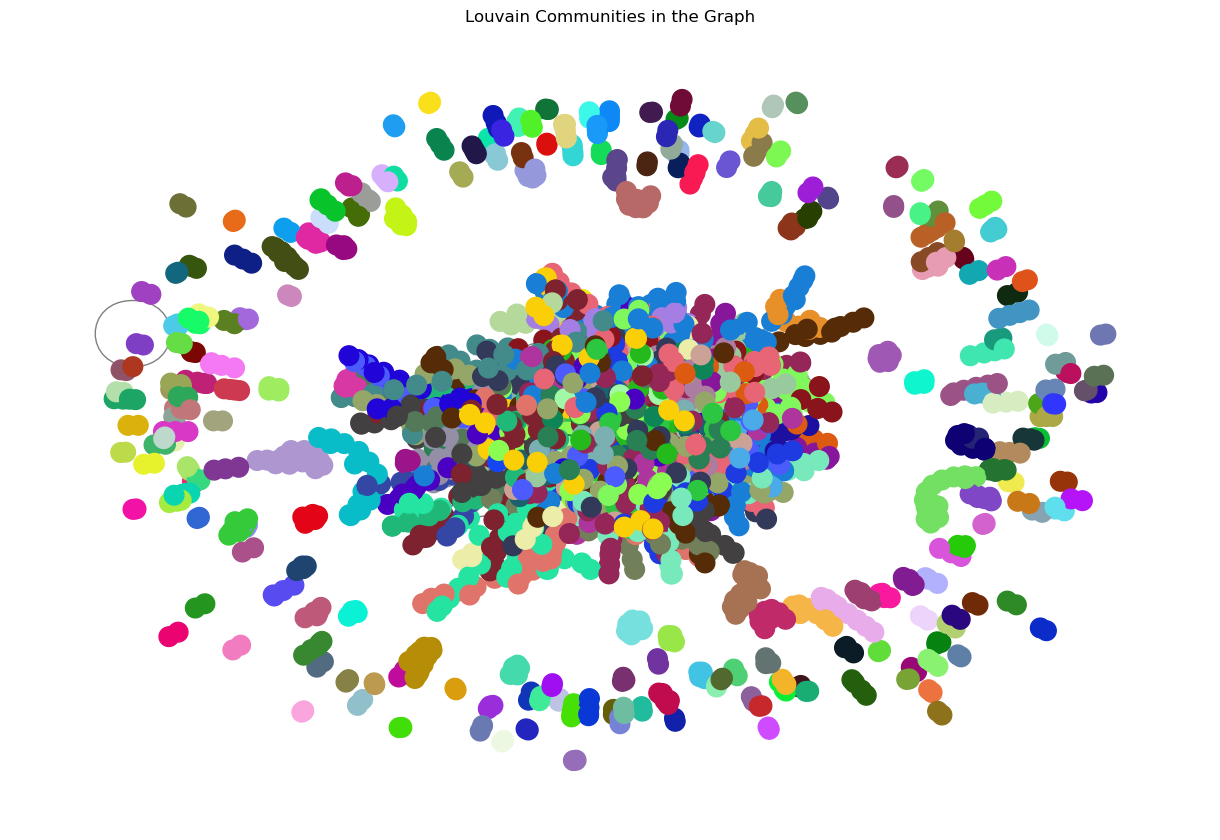

In [41]:

# Generate a random color for each community
community_colors = {i: [random.random() for _ in range(3)] for i in range(len(communities))}

# Assign colors to nodes based on their community
node_colors = [community_colors[node_community_map[node]] for node in G.nodes]

# Draw the graph with community-based coloring
plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos=nx.spring_layout(G, seed=42),
    node_color=node_colors,
    with_labels=False,
    node_size=200,
    edge_color="gray"
)
plt.title("Louvain Communities in the Graph")
plt.show()


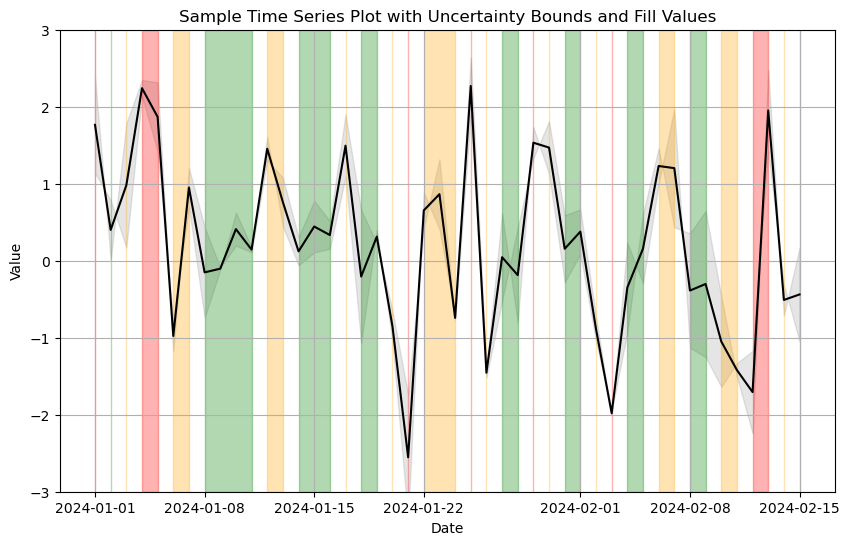

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate fake time series data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', end='2024-02-15', freq='D')
values = np.random.normal(loc=0, scale=1, size=len(dates))

# Generate uncertainty bounds
uncertainty = np.random.normal(loc=0, scale=0.5, size=len(dates))
lower_bound = values - uncertainty
upper_bound = values + uncertainty

# Plot time series with uncertainty bounds
plt.figure(figsize=(10, 6))
plt.plot(dates, values, color='black', label='Time Series')
plt.fill_between(dates, lower_bound, upper_bound, color='gray', alpha=0.2, label='Uncertainty Bounds')

# Plot fill values based on specified conditions
plt.fill_between(dates, -3, 3, where=(values >= -0.5) & (values <= 0.5), color='green', alpha=0.3, label='[-1, 1]')
plt.fill_between(dates, -3, 3, where=(abs(values) > 0.5) & (abs(values) <= 1.5), color='orange', alpha=0.3, label='(1, 2]')
plt.fill_between(dates, -3, 3, where=abs(values) > 1.5, color='red', alpha=0.3, label='> 2')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sample Time Series Plot with Uncertainty Bounds and Fill Values')
# plt.legend()
plt.grid(True)
plt.ylim(-3, 3)  # Set y-axis limit
plt.show()
